In [ ]:
using Fretem, Potential, Alphabeta, PyPlot, Printf, Fretdraw

### Part 0: Get collocation points and integration kernel for whole domain

In [2]:
Nh = 64    # The number of Spectral element
Np = 4     # The order of polynomial which used to interpolate and integration

# Define Physical Domain
xratio = 0.5
xavg = 1.0

x, w, Ldx, L = getLagrange(Np,xratio/Nh)
e_norm = x[end] - x[1]
interpo_xs = x .+ x[end]

N, xref, w0, Ldx, w = get_fem_xref_weights_basis(Nh, Np, xratio, xavg);

### Part 1: Get $V(x)$ and $p_{eq}(x)$

In [3]:
k_ref = 247.15
Vref = harmonic_well(xref, k_ref)
rho_eq = get_rhoeq(Vref, w0);

In [4]:
# physical parameters
n_photons = 4
dt = 1e-3 # 10^(-9)s
kbT = 1
D = 0.5; # Diffusion coefficient

In [4]:
# Simulation
"""
x_record = zeros(n_photons+1, 1)
t_record = zeros(n_photons+1, 1)

xpos = 1 # Initial Position
t = 0
x_record[1] = xpos
t_record[1] = t

# Simulation Start
for i = 2:n_photons+1
    F = force_harmonic_well(xpos, k_ref)
    xpos = xpos + D*dt*F +  (dt*2*kbT*D)^(1/2) * randn()
    t += dt
    x_record[i] = xpos
    t_record[i] = t
end
"""

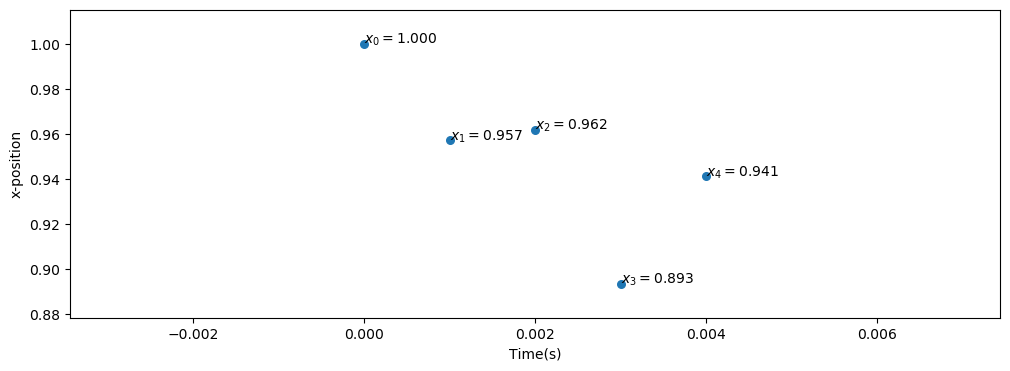

In [25]:
fig, ax = subplots(ncols=1, nrows=1, figsize=(12,4))

ax.scatter(t_record, x_record, s=30)
#ax.set_ylim(0.95, 1.05)
ax.set_ylabel("x-position")
ax.set_xlabel("Time(s)")

for i = 1:n_photons+1
    txt = @sprintf "\$ x_{%d} = %.3f \$" i-1 x_record[i]
    ax.text(t_record[i], x_record[i], txt, fontsize=10)
end
plt.savefig("four_states_simu.png", dpi=100)
plt.show()

In [19]:
x_record

5×1 Array{Float64,2}:
 1.0
 0.9573274207283767
 0.9618913327843462
 0.8934930709166439
 0.9413627793317679

### Part 2: Do FEM

In [5]:
Nv = 36 # Number of eigenvectors
D = 0.5 # Diffusion coefficients
LQ, Qx = fem_solve_eigen(Nh, Np, xratio, xavg, Vref, D, Nv);

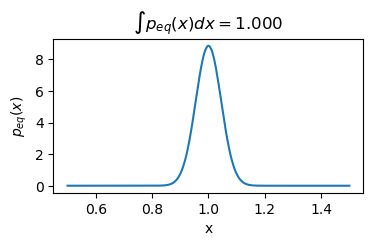

In [32]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4,2))
ax.plot(xref, Qx[:,1] .* Qx[:,1])
ax.set_xlabel("x")
ax.set_ylabel("\$p_{eq}(x)\$")
title = @sprintf "\$ \\int p_{eq}(x) dx = %.3f\$" sum(w0 .* (Qx[:,1].*Qx[:,1]))
ax.set_title(title)
plt.show()

### Part 3: $\left< \hat{\alpha}_{t_0}\right|$

In [6]:
k0 = 1000 # force constant of harmonic well
V0 = harmonic_well(xref, k0)
alpha_t0_x = get_alpha_t0_x_by_V0_Veq(w0, V0, Vref)
ahat_t0 = get_alpha_by_proj_alphax_to_Qx(w0, alpha_t0_x, Qx, Nv);  # return 36-elements vector

### Part 4: $\left< \hat{\alpha}_{t_1}\right|$

In [15]:
y = 0.957
ahat_t0_edt, ahat_t1 = calc_ahat_by_prev_ahat(ahat_t0, LQ, dt, xref, e_norm, interpo_xs, Np, w0, y, Qx);

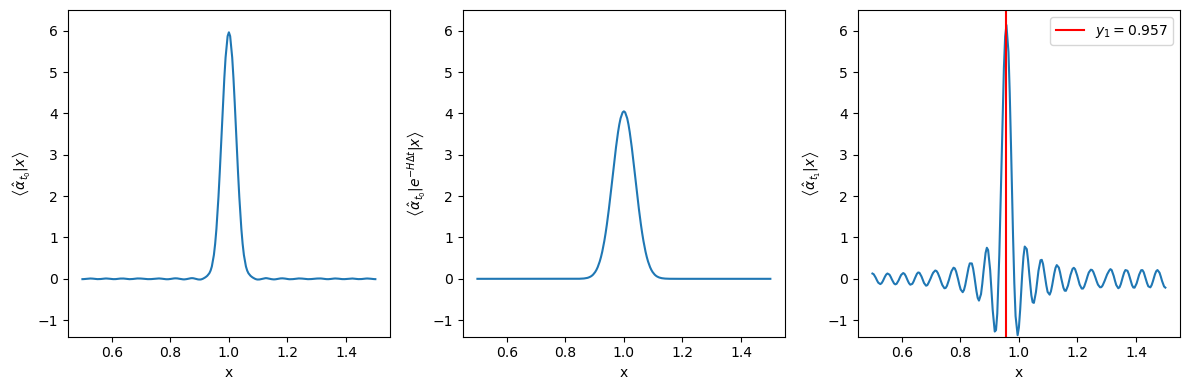

In [17]:
ylims = (-1.4, 6.5)
alpha_idx = 1
plot_alpha_cycle(xref, ahat_t0, ahat_t0_edt, ahat_t1, ylims, alpha_idx, y, Qx)
plt.tight_layout()
png_name = @sprintf "./png_folder/alpha_%d.png" alpha_idx
plt.savefig(png_name, dpi=100)
plt.show()

### Part 5: $\left< \hat{\alpha}_{t_2}\right|$

In [19]:
y = 0.96189
ahat_t1_edt, ahat_t2 = calc_ahat_by_prev_ahat(ahat_t1, LQ, dt, xref, e_norm, interpo_xs, Np, w0, y, Qx);

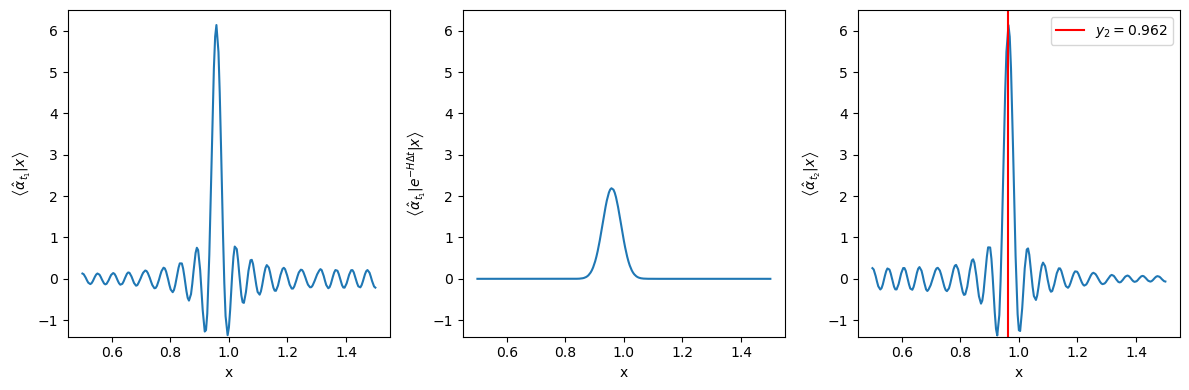

In [20]:
ylims = (-1.4, 6.5)
alpha_idx = 2
plot_alpha_cycle(xref, ahat_t1, ahat_t1_edt, ahat_t2, ylims, alpha_idx, y, Qx)
plt.tight_layout()
png_name = @sprintf "./png_folder/alpha_%d.png" alpha_idx
plt.savefig(png_name, dpi=100)
plt.show()

### Part 6: $\left< \hat{\alpha}_{t_3}\right|$

In [21]:
y = 0.89349
ahat_t2_edt, ahat_t3 = calc_ahat_by_prev_ahat(ahat_t2, LQ, dt, xref, e_norm, interpo_xs, Np, w0, y, Qx);

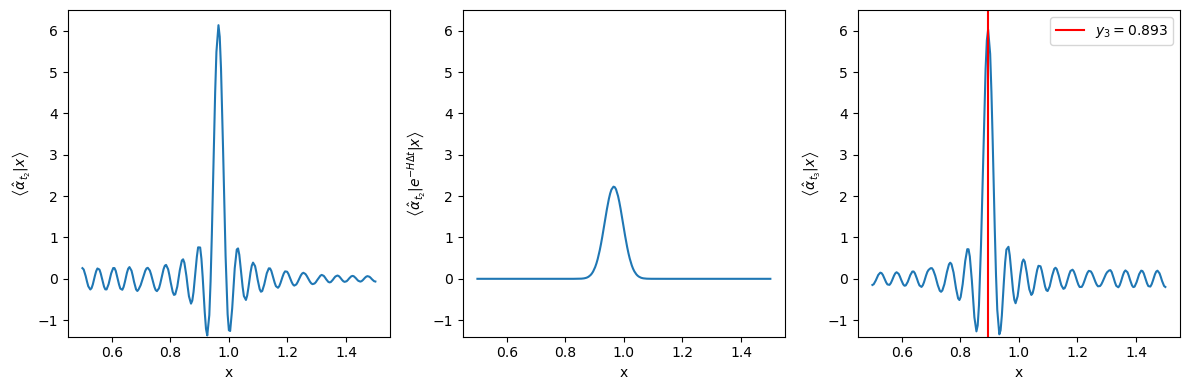

In [22]:
ylims = (-1.4, 6.5)
alpha_idx = 3
plot_alpha_cycle(xref, ahat_t2, ahat_t2_edt, ahat_t3, ylims, alpha_idx, y, Qx)
plt.tight_layout()
png_name = @sprintf "./png_folder/alpha_%d.png" alpha_idx
plt.savefig(png_name, dpi=100)
plt.show()

### Part 7: $\left< \hat{\alpha}_{t_4}\right|$

In [23]:
y = 0.94136
ahat_t3_edt, ahat_t4 = calc_ahat_by_prev_ahat(ahat_t3, LQ, dt, xref, e_norm, interpo_xs, Np, w0, y, Qx);

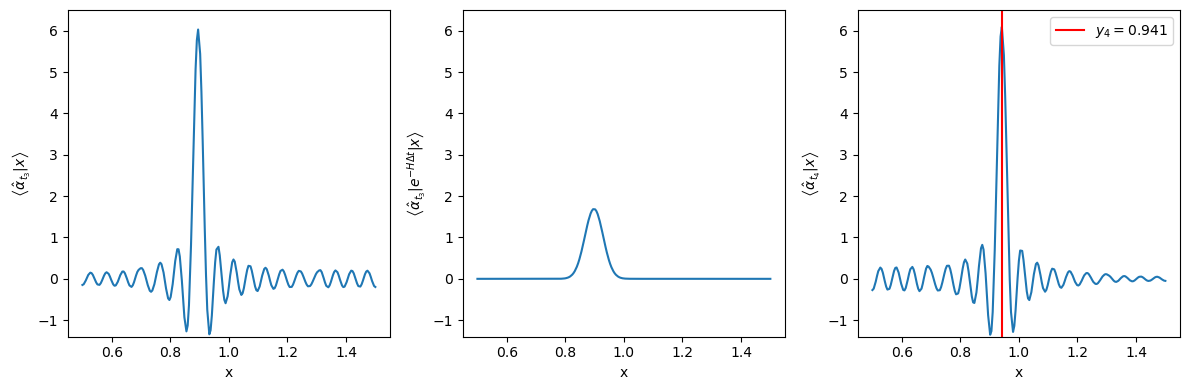

In [24]:
ylims = (-1.4, 6.5)
alpha_idx = 4
plot_alpha_cycle(xref, ahat_t3, ahat_t3_edt, ahat_t4, ylims, alpha_idx, y, Qx)
plt.tight_layout()
png_name = @sprintf "./png_folder/alpha_%d.png" alpha_idx
plt.savefig(png_name, dpi=100)
plt.show()

### Part 8: $ \left| \beta_{t_4}\right>$

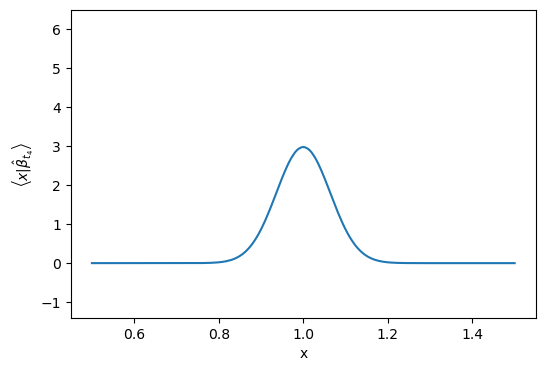

In [29]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 4))
ax.plot(xref, rho_eq)
ax.set_ylim(ylims)
ax.set_xlabel("x")
ax.set_ylabel("\$ \\left< x | \\hat{\\beta}_{t_4} \\right> \$")
plt.savefig("beta_4.png",dpi=100)
plt.show()

$\left< \hat{\alpha}_{t_4} | \beta_{t_4}\right>$

In [39]:
ahat_t4_x = proj_vector_from_eigenspace_to_xspace(Qx, ahat_t4)
b_t4_x = rho_eq
ahat_b_t4 = sum(w0 .* (ahat_t4_x .* b_t4_x))

0.32164759563952594

### Part 9: Log-likelihood 

In [31]:
function norm(vector)
    return sqrt(sum(vector .^ 2))
end

norm (generic function with 1 method)

In [40]:
first_term = log(norm(ahat_t0_edt)) + log(norm(ahat_t1_edt)) + log(norm(ahat_t2_edt)) + log(norm(ahat_t3_edt))
second_term = log(ahat_b_t4)
l = 2 * first_term + second_term

-5.463651129644981